# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

**Nama:** Dicky Candid Saragih

**Email:** dickysargih050901@gmail.com

**Id dicoding :** a352ybf127


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load dataset

In [2]:
url = 'https://raw.githubusercontent.com/DickySaragih/Data_science_01/refs/heads/main/employee_data.csv'
df = pd.read_csv(url)

# Data understanding

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...  

In [4]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 

In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0     

In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBala

In [7]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"- {col}: {df[col].unique()}")


Unique values in categorical columns:
- BusinessTravel: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
- Department: ['Human Resources' 'Research & Development' 'Sales']
- EducationField: ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']
- Gender: ['Male' 'Female']
- JobRole: ['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']
- MaritalStatus: ['Married' 'Single' 'Divorced']
- Over18: ['Y']
- OverTime: ['Yes' 'No']


In [9]:
print("\nValue counts in categorical columns:")
for col in categorical_cols:
    print(f"\n- {col}:")
    print(df[col].value_counts())




Value counts in categorical columns:

- BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

- Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

- EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

- Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

- JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

- MaritalStatus:
MaritalStatus
Married     673
Single      470

# cleaning data

In [10]:
# Hapus baris dengan nilai kosong pada kolom Attrition
df = df.dropna(subset=['Attrition'])
# Ubah tipe data Attrition menjadi integer
df['Attrition'] = df['Attrition'].astype(int)
# Hapus kolom yang tidak relevan
cols_to_drop = ['EmployeeId', 'Over18', 'StandardHours', 'EmployeeCount']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


<ipython-input-10-2a743bc605a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].astype(int)
<ipython-input-10-2a743bc605a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


#Exploratory Data Analysis (EDA)

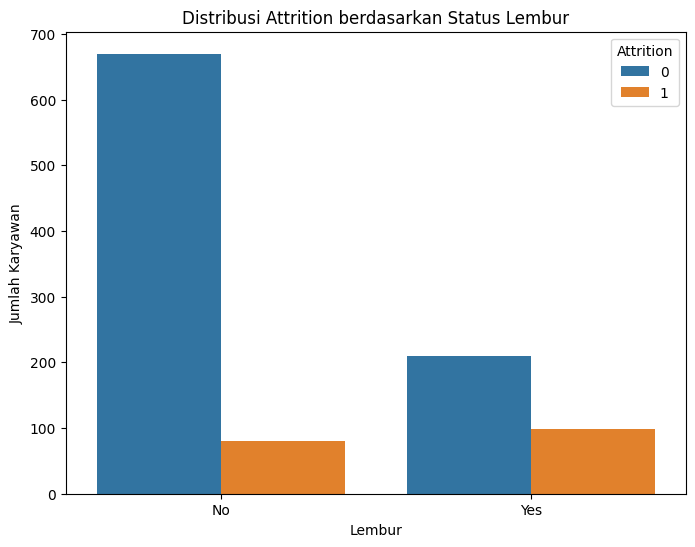


Tingkat Attrition berdasarkan Status Lembur:


Attrition,0,1
OverTime,,
No,0.892144,0.107856
Yes,0.680782,0.319218


In [11]:
# pertanyaan 1: Menganalisis distribusi attrition berdasarkan status lembur karyawan.
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Distribusi Attrition berdasarkan Status Lembur')
plt.xlabel('Lembur')
plt.ylabel('Jumlah Karyawan')
plt.show()

attrition_overtime = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
print("\nTingkat Attrition berdasarkan Status Lembur:")
attrition_overtime

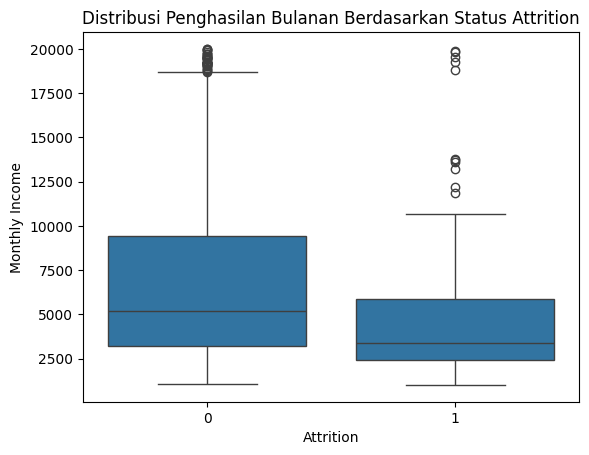

In [12]:
# Apakah karyawan dengan penghasilan bulanan rendah lebih rentan mengalami attrition dibandingkan karyawan dengan penghasilan tinggi?
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Distribusi Penghasilan Bulanan Berdasarkan Status Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

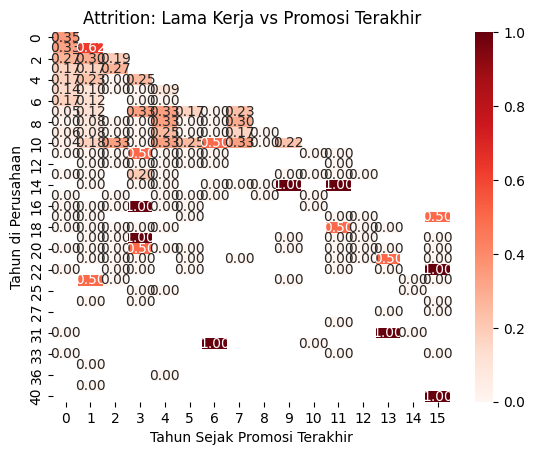

In [13]:

# Pertanyaan 3: Hubungan Lama Kerja dan Promosi Terakhir dengan Attrition
heatmap_data = df.groupby(['YearsAtCompany', 'YearsSinceLastPromotion'])['Attrition'].mean().unstack()
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.2f')
plt.title('Attrition: Lama Kerja vs Promosi Terakhir')
plt.xlabel('Tahun Sejak Promosi Terakhir')
plt.ylabel('Tahun di Perusahaan')
plt.show()

#### insight

insight kunci yang dapat diperoleh adalah:

1.  **Menganalisis distribusi attrition berdasarkan status lembur karyawan.:**
    *   Visualisasi menunjukkan bahwa karyawan yang melakukan lembur (OverTime = 'Yes') memiliki tingkat *attrition* yang secara signifikan lebih tinggi dibandingkan dengan karyawan yang tidak lembur (OverTime = 'No'). Hal ini mengindikasikan bahwa beban kerja yang berlebihan atau tidak adanya keseimbangan kehidupan kerja dapat menjadi faktor pendorong karyawan untuk meninggalkan perusahaan.
2.  **Apakah karyawan dengan penghasilan bulanan rendah lebih rentan mengalami attrition dibandingkan karyawan dengan penghasilan tinggi?**
    *   Dari visualisasi distribusi penghasilan bulanan berdasarkan status attrition, terlihat bahwa karyawan yang mengalami attrition (bernilai 1 pada sumbu x) cenderung memiliki penghasilan bulanan yang lebih rendah dibandingkan dengan karyawan yang bertahan (bernilai 0 pada sumbu x). Boxplot menunjukkan bahwa median MonthlyIncome untuk kelompok attrition lebih rendah, dan distribusi penghasilannya juga lebih terkonsentrasi pada nilai-nilai yang lebih rendah dibandingkan dengan kelompok yang bertahan. Ini mengindikasikan bahwa tingkat penghasilan bulanan merupakan salah satu faktor penting yang berkorelasi dengan kecenderungan karyawan untuk meninggalkan perusahaan, di mana penghasilan yang lebih rendah berpotensi menjadi pendorong attrition.
3.  **Hubungan Lama Kerja dan Promosi Terakhir dengan Attrition:**
    *   *Heatmap* menampilkan rata-rata *attrition* berdasarkan kombinasi *YearsAtCompany* (Lama Kerja di Perusahaan) dan *YearsSinceLastPromotion* (Tahun Sejak Promosi Terakhir). Amati sel-sel di *heatmap* yang memiliki nilai *attrition* tinggi. Ini dapat menunjukkan bahwa karyawan yang sudah lama di perusahaan tetapi belum dipromosikan dalam jangka waktu tertentu mungkin memiliki kecenderungan *attrition* yang lebih tinggi. Insight ini relevan untuk strategi retensi yang berkaitan dengan jalur karir dan promosi.


# Data preparation

In [14]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop('Attrition', axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


#### Insight

Dalam tahap data preparation untuk analisis attrition karyawan, dilakukan pembersihan data dengan menghapus baris yang memiliki missing value pada kolom target 'Attrition' demi menjaga integritas pelatihan model. Kolom target ini juga dikonversi menjadi numerik agar kompatibel dengan algoritma klasifikasi. Beberapa kolom seperti 'EmployeeId', 'Over18', 'StandardHours', dan 'EmployeeCount' dihapus karena tidak relevan atau tidak memberikan informasi prediktif. Seluruh variabel kategorikal kemudian dikodekan menggunakan Label Encoding agar bisa diproses oleh model, meskipun pendekatan ini berisiko memperkenalkan hubungan ordinal semu. Fitur numerik kemudian dinormalisasi menggunakan StandardScaler untuk memastikan kontribusi yang seimbang antar fitur. Akhirnya, data dibagi menjadi set pelatihan dan pengujian dengan rasio 80:20 menggunakan stratified sampling untuk menjaga distribusi kelas, serta random_state=42 untuk memastikan hasil dapat direproduksi.


# Modeling

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### insight
dari proses modeling, model RandomForestClassifier dilatih menggunakan data karyawan yang telah dibersihkan, diencode, dan dinormalisasi, dengan data dibagi menjadi set pelatihan dan pengujian secara stratified untuk menangani ketidakseimbangan kelas, menghasilkan prediksi *attrition* pada set pengujian.

# Model evaluasi

Akurasi Model: 0.8584905660377359

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       176
           1       1.00      0.17      0.29        36

    accuracy                           0.86       212
   macro avg       0.93      0.58      0.60       212
weighted avg       0.88      0.86      0.81       212



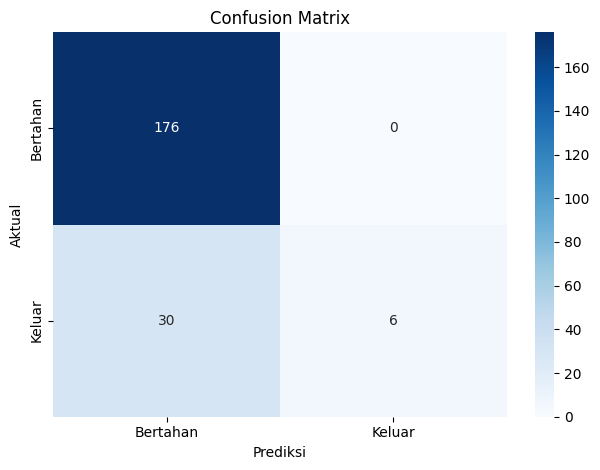

In [16]:
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bertahan', 'Keluar'], yticklabels=['Bertahan', 'Keluar'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

#### insight

Model klasifikasi menunjukkan akurasi sebesar 86,0%, yang tampaknya cukup tinggi. Namun, setelah ditelusuri lebih lanjut melalui classification report dan confusion matrix, terlihat adanya ketidakseimbangan performa pada prediksi kelas minoritas (Attrition = 1 / "Keluar"). Model berhasil memprediksi dengan baik karyawan yang bertahan (176 benar dari 176), tetapi sangat lemah dalam mendeteksi karyawan yang keluar (hanya 6 dari 36 yang benar). Ini terlihat dari nilai recall kelas 1 yang hanya 0.17 dan f1-score yang rendah (0.29).

Dengan kata lain, meskipun akurasinya tinggi, model ini belum optimal untuk memprediksi kasus 'attrition', yang sebenarnya justru merupakan fokus utama dari analisis ini. Ini menunjukkan perlunya penanganan data imbalance lebih lanjut (seperti oversampling/undersampling, atau menggunakan algoritma khusus untuk data tidak seimbang) agar model dapat lebih sensitif terhadap karyawan yang berpotensi keluar.

# visualisasi data

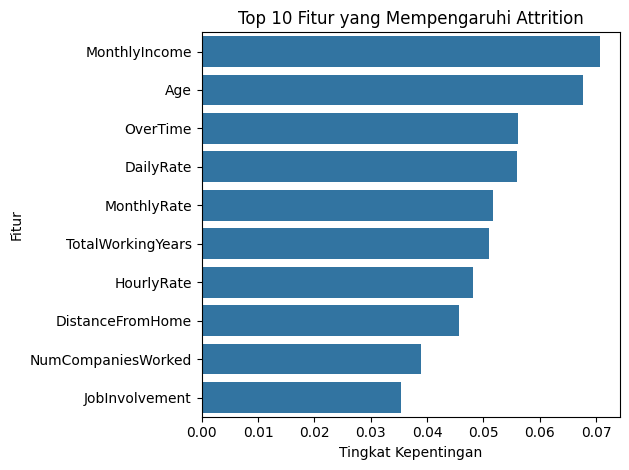

In [17]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Fitur yang Mempengaruhi Attrition')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


#### insight


Berdasarkan grafik Top 10 Fitur yang Mempengaruhi Attrition, terlihat bahwa faktor paling signifikan yang memengaruhi kemungkinan karyawan keluar dari perusahaan adalah Monthly Income (Pendapatan Bulanan) dan Age (Usia). Ini menunjukkan bahwa karyawan dengan gaji rendah dan usia tertentu lebih rentan mengalami attrition. Faktor berikutnya yang juga berpengaruh besar adalah OverTime, yang menandakan bahwa beban kerja lembur berkaitan erat dengan keputusan karyawan untuk keluar. Selain itu, DailyRate, MonthlyRate, dan TotalWorkingYears juga berkontribusi signifikan, mengindikasikan bahwa faktor kompensasi dan pengalaman kerja turut memengaruhi retensi. Faktor seperti DistanceFromHome dan JobInvolvement pun tak kalah penting, memperlihatkan bahwa keterlibatan dalam pekerjaan dan jarak ke kantor dapat memengaruhi loyalitas karyawan terhadap perusahaan. Insight ini dapat dijadikan dasar strategi retensi, terutama dengan meninjau ulang kebijakan kompensasi dan manajemen beban kerja.